#1 import libraries



In [27]:
import torch
import matplotlib.pyplot as plt

from torch import nn

# Data creation

In [28]:
w=0.7
bias=0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=w*X+bias
len(X),len(y)

(50, 50)

# seprate the training and test data

In [29]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [30]:
X_train[:5],y_train[:5]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

#building a plot function

In [31]:
def plot_predictions(train_data=X_train,
                     label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,label)
  plt.scatter(test_data,test_label
                     )
  if predictions is not None:
    plt.scatter(test_data,predictions)
  plt.show()

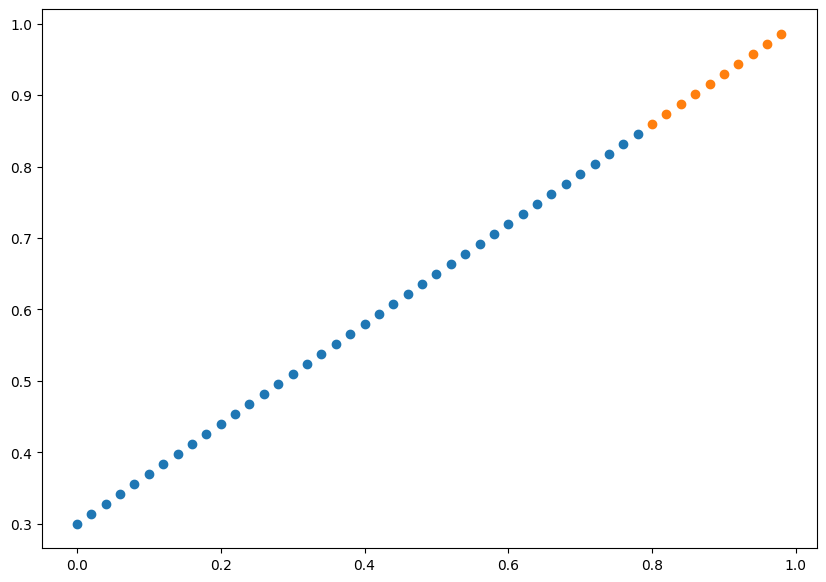

In [32]:
plot_predictions()

# building the Linear Regression model

In [33]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weigths=nn.Parameter(torch.randn(1,requires_grad=True,dtype=float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weigths*x+self.bias

#instansciate  model


In [34]:
torch.manual_seed(42)
model_1=LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weigths', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

OrderedDict([('weigths', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

#making some predictions

In [35]:
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

# ploting these

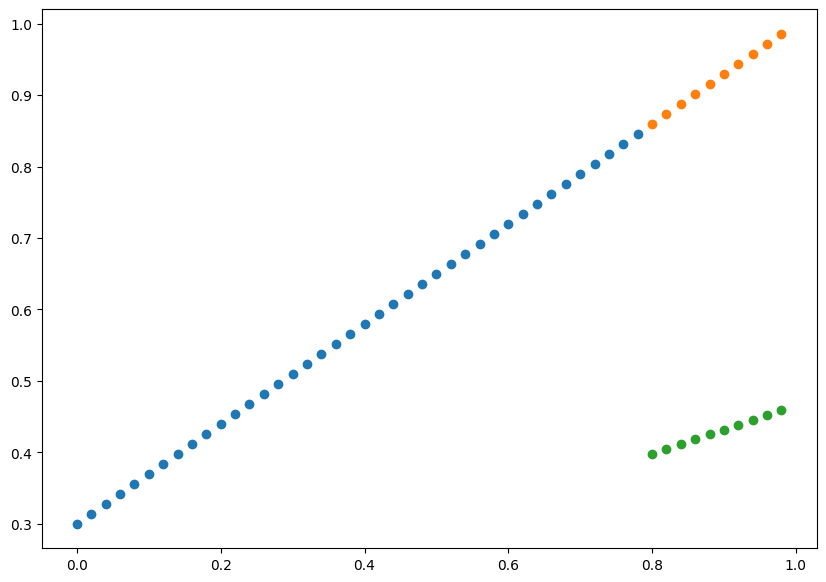

In [36]:
plot_predictions(predictions=y_preds)

# training Model

setting up

optimizers and loss functions

In [37]:
loss = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

# training loop

In [51]:
epochs=100
#track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(X_train)
  loss_train=loss(y_pred,y_train)
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()
  #printout whats happing
  if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss_train)
      test_loss_values.append(loss(model_1(X_test),y_test))
      print(f"Epoch:{epoch} , test loss:{test_loss_values}")
      print(model_1.state_dict())

Epoch:0 , test loss:[tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>)]
OrderedDict([('weigths', tensor([0.6951], dtype=torch.float64)), ('bias', tensor([0.2993], dtype=torch.float64))])
Epoch:10 , test loss:[tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>), tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>)]
OrderedDict([('weigths', tensor([0.6951], dtype=torch.float64)), ('bias', tensor([0.2993], dtype=torch.float64))])
Epoch:20 , test loss:[tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>), tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>), tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>)]
OrderedDict([('weigths', tensor([0.6951], dtype=torch.float64)), ('bias', tensor([0.2993], dtype=torch.float64))])
Epoch:30 , test loss:[tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>), tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>), tensor(0.0050, dtype=torch.float64, grad_fn=<MeanBackward0>), tensor(0.0

# testing loop


In [43]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

# plot predictions with trained model

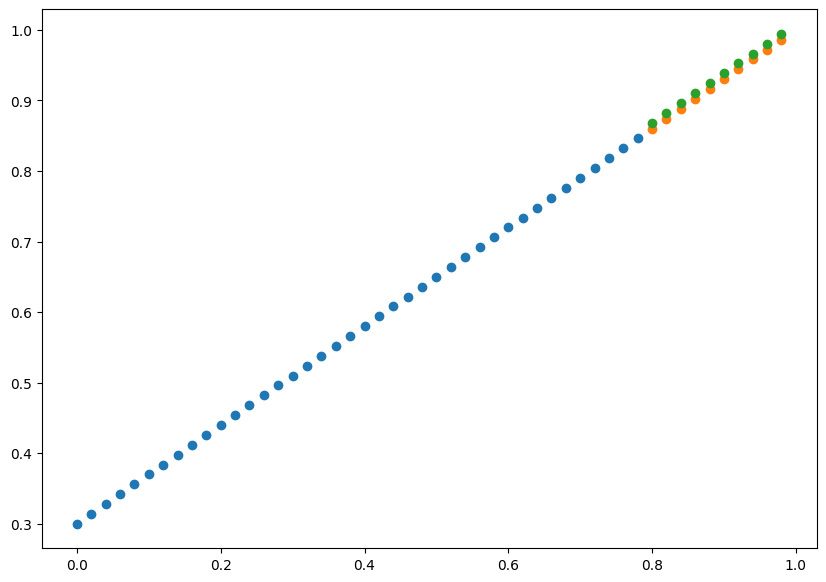

In [44]:

plot_predictions(predictions=y_preds)

In [45]:
model_1.state_dict()

OrderedDict([('weigths', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093], dtype=torch.float64))])

# saving the model


In [54]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="Linear Regression Pytorch.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

#loading the model


In [55]:
loaded_model_1=LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [56]:
with torch.inference_mode():
  y_preds=loaded_model_1(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

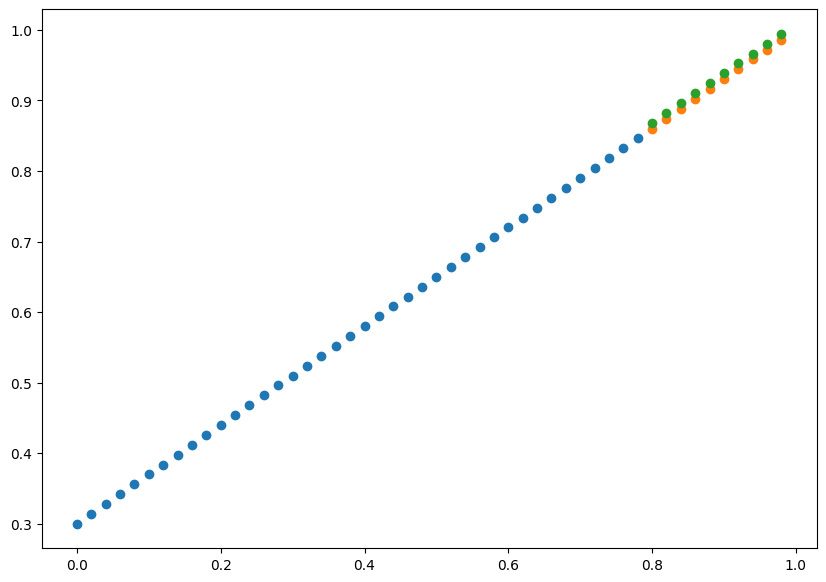

In [57]:
plot_predictions(predictions=y_preds)